## Подготовка и обработка данных.

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime as dt

Откроем файлы с данными и посмотрим информацию.

In [2]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В столбцах 'date' не правильно распознан тип данных. Используем функцию pd.to_datetime.

In [5]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим, все ли получилось.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Узнаем минимальную и максимальную дату заказов.

In [8]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [9]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Проверим на дубликаты:

In [10]:
orders.duplicated().sum(), visitors.duplicated().sum()

(0, 0)

Проверяем на пропуски.

In [11]:
orders.isna().sum(), visitors.isna().sum()

(transactionId    0
 visitorId        0
 date             0
 revenue          0
 group            0
 dtype: int64,
 date        0
 group       0
 visitors    0
 dtype: int64)

Посмотрим,есть ли пользователи, попавшие в обе группы.

In [12]:
orders.groupby('visitorId').agg({'group':'nunique'}).query('group > 1')

,group
visitorId,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2
351125977,2
393266494,2
457167155,2
471551937,2


### Вывод:
Мы изучили и обработали данные. Заменили типы данных в двух столбцах 'date' на необходимые. Пропусков и дубликатов не обнаружено. Период теста: 01.08.2019 - 01.09.2019. Стоит отметить, что есть пользователи,оказавшиеся в двух группах теста одновременно.

## Приоритизация гипотез.

Откроем файл с данными и приведем названия столбцов к нижнему регистру.

In [13]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
pd.set_option('display.max_colwidth', 1000)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем в порядке убывания.

In [14]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

pd.set_option('display.max_colwidth', 1000)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк RICE для приоритизации гипотез и отсортируем в порядке убывания.

In [15]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)

pd.set_option('display.max_colwidth', 1000)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод:
При применении ICE высокую оценку имели гипотезы 8,0,7. После применения RICE приоритет гипотез изменился на 7, 2 и 0. Это связано с тем, что в RICE учитывается кол-во пользователей, которых коснется изменение. Соответственно оценка увлечилась. Наиболее приоритетными гипотезами выбираем 7, 2 и 0.

## График кумулятивной выручки по группам.


Чтобы исключить проблему подсматривания проанализируем графики кумулятивных данных. Создадим массив уникальных пар значений дат и групп теста с помощью метода drop_duplicates

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Получим агретированные по дням данные о заказах и посетителях и с помощью метода merge объеденим все в одну таблицу. Переименуем столбцы.

In [17]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создаем датафреймы по группам и строим график.

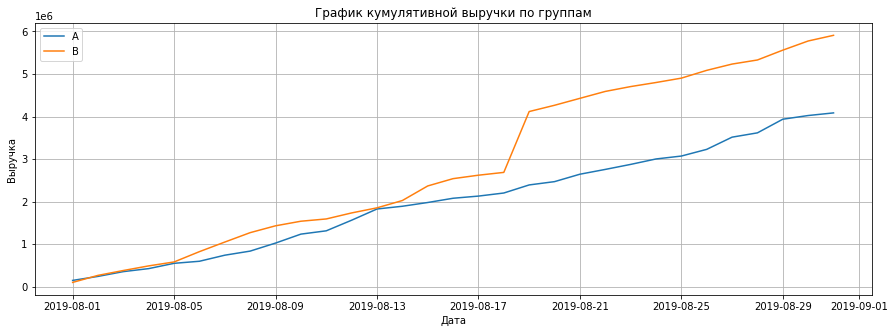

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А и B

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')

plt.grid()
plt.legend()

### Вывод:
Мы наблюдаем равномерный рост выручки с течением времени теста. Однако, в группе B наблюдаются несколько резких точек роста- 14.08.2019 и 19.08.2019. Это может быть связано с большим кол-вом заказов в эти дни или высокой стоимостью заказа. Также, можно сказать, что выручка группы B стабильно больше группы A.

## График кумулятивного среднего чека по группам.

Строим график кумулятивного среднего чека. Делим выручку на число заказов.

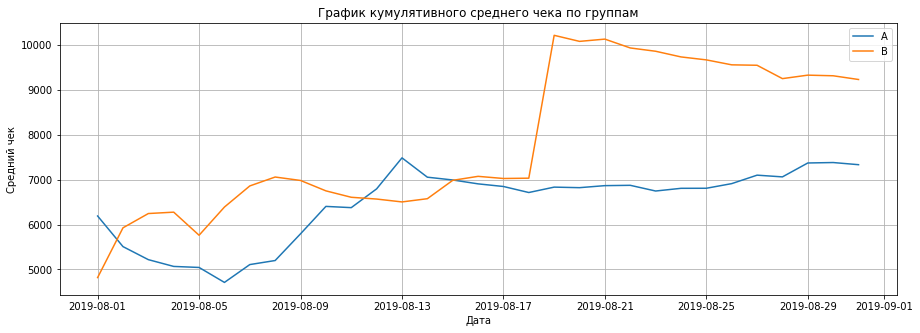

In [21]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.grid()
plt.legend()

### Вывод:
График очень нестабилен. Резкий скачок среднего чека в группе В, скорее всего вызван аномальными значениями, в те же даты, что и на прошлом графике. К концу теста средний чек стал более равномерным, чем в начале. Можно сделать вывод, что средний чек группы В выше,чем группы А.

## График относительного изменения кумулятивного среднего чека группы B к группе A.

Построим графи относительного изменения кумулятивного среднего чека группы В к группе А. Для этого рассчитаем каждую точку графика следующим образом: кумулятивная метрика группы B / кумулятивная метрика группы A - 1.

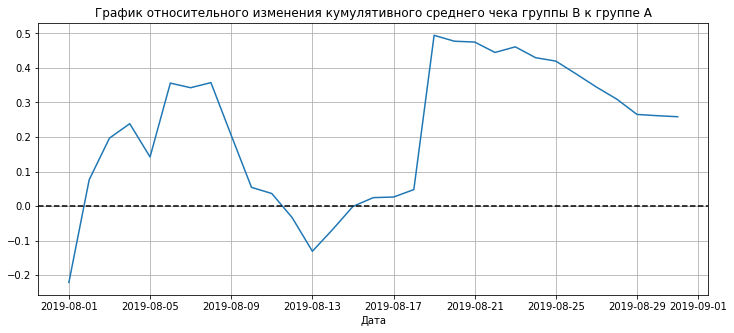

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

## Вывод:
Мы видим, что график нестабильный. Необходимо проверить данные на содержаний аномальных значений.

## График кумулятивной конверсии по группам. 

Строим график кумулятивной конверсии. Делим число заказов на число пользователей.

(18109.0, 18140.0, 0.029, 0.04)

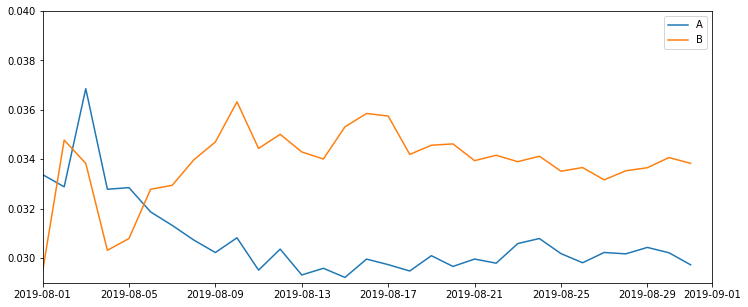

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.029, 0.04])

### Вывод:
Наблюдаются резкие скачки конверсии в начале графика.В начале теста группа А лидировала по конверсии,но уже с 09.08.2019 она стабильно хуже, чем в группе В. К концу теста график стабилизировался. 

## График относительного изменения кумулятивной конверсии группы B к группе A.

Строим график относительного изменения конверсии.

(18109.0, 18140.0, -0.2, 0.3)

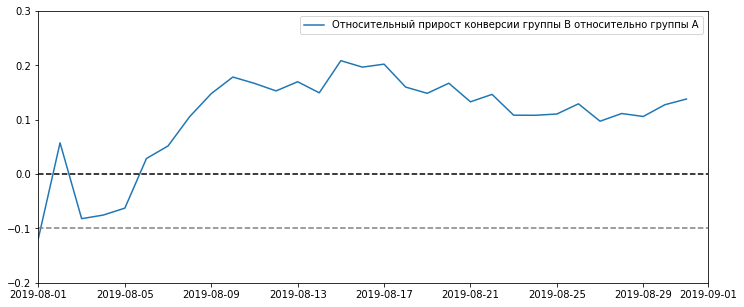

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])

### Вывод:
В начале теста группа В лидировала недолго и затем резко опустилась. Затем, конверсия стала постепенно расти и установила лидирующую позицию до конца проведения теста.

## Точечный график количества заказов по пользователям. 

Построим график числа заказов по пользователям, чтобы наглядно увидеть выбросы.

Text(0.5, 0, 'Число пользователей')

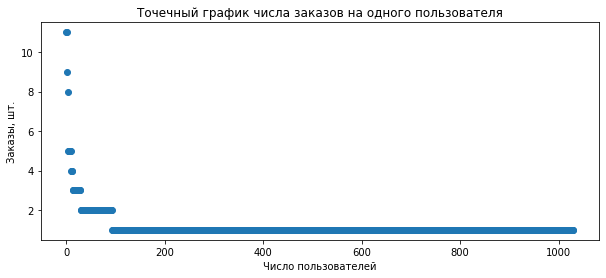

In [25]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график числа заказов на одного пользователя')
plt.ylabel('Заказы, шт.')
plt.xlabel('Число пользователей')


### Вывод:
Действительно, в числе заказов есть выбросы. Судя по графику, большинство пользователей не совершают более двух заказов. 

## 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

Посчитаем перцентили, чтобы точно установить границу аномальных пользователей.

In [26]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


Как мы и предполагали, только 5% польщователей делают более 2 заказов.

## Точечный график стоимостей заказов.

(0.0, 1200.0, 0.0, 200000.0)

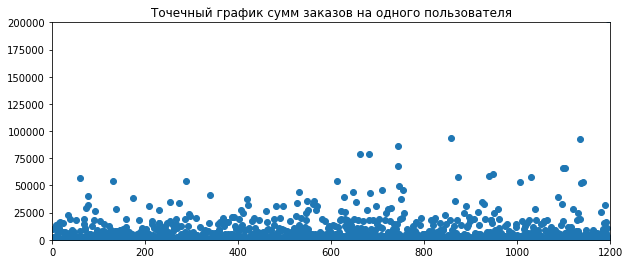

In [27]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])

### Вывод:
Судя по графикам, большинство пользователей не делает заказы на сумму свыше около 30000 рублей.

## 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

Посчитаем перцентили:

In [28]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0],percentiles[1]))

Перцентили:
95: 28000
99: 58233


Действительно, не более 5% пользователей совершают покупку на сумму свыше 28000.

## Статистическая значимость различий в конверсии между группами по «сырым» данным.

Посчитаем статистическую значимость различий в конверсии по сырым данным. Сформулируем гипотезы. 
- Нулевая: различий в конверсии между группами нет.
- Альтернативная: различия в конверсии между группами есть.

In [29]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима.')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет.')


Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
По неочищенным данным в конверсии групп A и B разница статистически значима.


### Вывод:
Мы видим, что p-value меньше alpha. Значит, делаем вывод, что разница конверсий статистически значима. Соответственно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [30]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным разница в средних чеках в группах A и B статистически значима.')
else:
    print('По неочищенным данным различий в средних чеках в группах A и B нет.')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.7292909855432458
По неочищенным данным различий в средних чеках в группах A и B нет.


### Вывод:
Мы видим, что p-value больше alpha. Значит, делаем вывод, что разницы в среднем чеке нет. Соответственно, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

## Статистическая значимость различий в конверсии между группами по «очищенным» данным.

Сформируем список и узнаем число аномальных пользователей.

In [31]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
limit_orders = 2
limit_revenue = 30000
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 68


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.Применим статистический критерий Манна-Уитни к полученным выборкам.

In [32]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B разница статистически значима.')
else:
    print('По очищенным данным различий в конверсии групп A и B нет.')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.172
P-value: 0.013342593737128651
По очищенным данным в конверсии групп A и B разница статистически значима.


### Вывод:
Мы видим, что p-value уменьшилась, соответственно прирост конверсии увеличился с 14% до 17%. Посмотрим на средний чек.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [33]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным разница в средних чеках в группах A и B статистически значима.')
else:
    print('По очищенным данным различий в средних чеках в группах A и B нет.')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.023
P-value: 0.7204664998107033
По очищенным данным различий в средних чеках в группах A и B нет.


### Вывод:
Мы видим, что после "очищения" данных разница в средних чеках практически минимальна.

## Решение по результатам теста

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Какие выводы, исходя из графиков мы можем сделать:
- По конверсии разница статистически значима;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График конверсии показывает, что группа В стабильно выше группы А.

При выгрузке файла с гипотезами мы применили фреймворки ICE и RICE. Наиболее приоритетными гипотезами выбрали - 7, 2 и 0.

До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных.Данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B.